In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     / 34.6 MB 164.9 MB/s
     |████████████████████████████████| 10.1 MB 4.3 MB/s 
     |████████████████████████████████| 636 kB 50.4 MB/s 
     |████████████████████████████████| 102 kB 57.9 MB/s 
     |████████████████████████████████| 675 kB 49.9 MB/s 
     |████████████████████████████████| 3.1 MB 26.0 MB/s 
     |████████████████████████████████| 62 kB 761 kB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 812 kB 42.6 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=489772495eaaa6bf8bc70bc51897522590c0d3d3a68f817d8fc467bcdd2649cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-wv7usudx/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=bd70a18d32f18fa2026a766a0168a690ae6a619e430b5d98e672a2077d6f7458
  S

In [1]:
! pip install eli5

     |████████████████████████████████| 106 kB 5.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
df = pd.read_csv("titanic.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df = df.fillna(df.mean())

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
feature = ['PassengerId','Pclass','Age','SibSp','Parch']
X = df[feature]
y = df.Survived

In [21]:
X.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
dtype: int64

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
df1 = df[['SibSp', 'Survived']]

In [34]:
groupbySib = df.groupby(['SibSp']).sum()

In [36]:
groupbySib.Survived

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

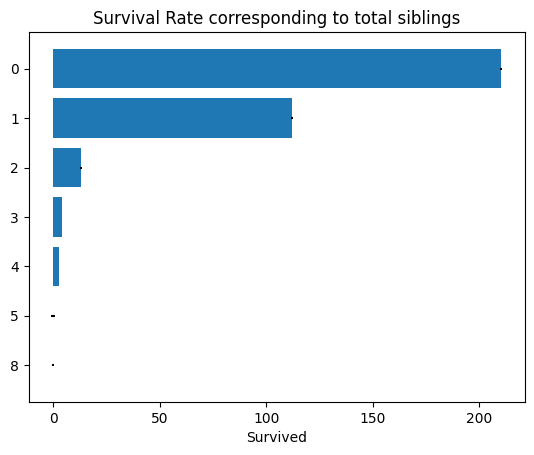

In [45]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
SibSp = ('0','1','2','3','4','5','8')
y_pos = np.arange(len(SibSp))
Survived = groupbySib.Survived
error = np.random.rand(len(SibSp))

ax.barh(y_pos, Survived, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(SibSp)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Survived')
ax.set_title('Survival Rate corresponding to total siblings')

plt.show()

Here we can see passanger with fewer siblings tends to survive

In [46]:
profile = ProfileReport(df, title = 'Mall Customers', html={'style':{'full_width':True}})

In [47]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch
331,332,1,45.5,0,0
733,734,2,23.0,0,0
382,383,3,32.0,0,0
704,705,3,26.0,1,0
813,814,3,6.0,4,2


In [49]:
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = model.predict(X_test)
print("Predicted Values:")
print(y_pred)
print("Actual Values:")
print(y_test.values)

Predicted Values:
[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0]
Actual Values:
[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [55]:
model.coef_

array([[ 2.69116590e-06, -9.85051578e-01, -3.27767530e-02,
        -2.18516460e-01,  2.63107489e-01]])

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [65]:
Recall = tp/(tp+fn)
Precision = tp/(tp+fp)
f1 = 2*((Precision*Recall)/(Precision+Recall))
accuracy = (tp+tn)/(tp+tn+fn+fp)

In [67]:
accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}')
print(f'f1 = {f1}')
print(f'Precision = {Precision}')
print(f'Recall = {Recall}')

Accuracy = 0.7430167597765364
f1 = 0.6290322580645161
Precision = 0.78
Recall = 0.527027027027027


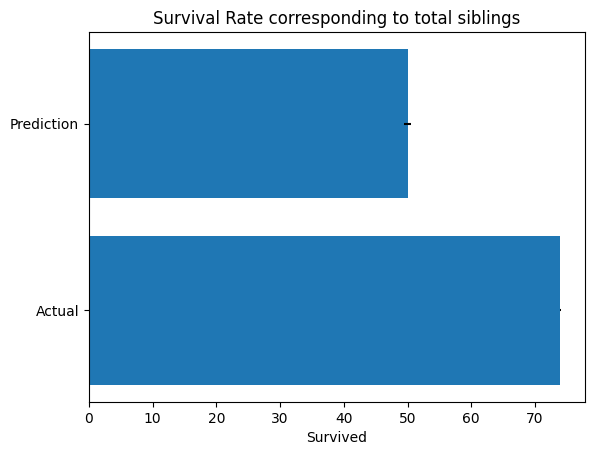

In [74]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
Data = ('Prediction','Actual')
y_pos = np.arange(len(Data))
Survived = [sum(y_pred),sum(y_test)]
error = np.random.rand(len(Data))

ax.barh(y_pos, Survived, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Data)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Survived')
ax.set_title('Predicted vs Measure')
plt.show()

In [70]:
sum(y_pred)

50

In [71]:
sum(y_test)

74